<h1><center><strong>Cardiovascular-Disease-prediction</strong></center></h1>
 <hr style="color:#E1CF01">

# Introduction

-----------------

The cardiovascular system is made up of the heart and blood vessels. Cardiovascular disease (CVD) is defined as any serious, abnormal condition of the heart or blood vessels(arteries, veins). 
Many cardiovascular diseases are preventable.

- **data:** Cardiovascular Disease dataset.
- **source:** Kaggle.
- **Features:**13.
- **Rows:** 70000.
- all the dataset values wear collected at the moment of medical examination.

#  EDA

------------

## A- Reading Data:


#### Import libraries:

In [86]:
import plotly.express as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
import seaborn as sb
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
!pip install xgboost
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
!pip install lightgbm
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split, GridSearchCV, \
RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score, accuracy_score, classification_report,\
confusion_matrix, roc_auc_score, plot_confusion_matrix, plot_roc_curve
!pip install mlxtend --quiet
from mlxtend.classifier import StackingCVClassifier

#### Read and discover the dataset:

In [2]:
df =pd.read_csv('cardio_train.csv',sep=';')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.00,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.00,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.00,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.00,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.00,100,60,1,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.00,49972.42,28851.30,0.00,25006.75,50001.50,74889.25,99999.00
age,70000.00,19468.87,2467.25,10798.00,17664.00,19703.00,21327.00,23713.00
gender,70000.00,1.35,0.48,1.00,1.00,1.00,2.00,2.00
height,70000.00,164.36,8.21,55.00,159.00,165.00,170.00,250.00
weight,70000.00,74.21,14.40,10.00,65.00,72.00,82.00,200.00
ap_hi,70000.00,128.82,154.01,-150.00,120.00,120.00,140.00,16020.00
ap_lo,70000.00,96.63,188.47,-70.00,80.00,80.00,90.00,11000.00
cholesterol,70000.00,1.37,0.68,1.00,1.00,1.00,2.00,3.00
gluc,70000.00,1.23,0.57,1.00,1.00,1.00,1.00,3.00
smoke,70000.00,0.09,0.28,0.00,0.00,0.00,0.00,1.00


In [6]:
#Check if data is imbalance or not
df.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

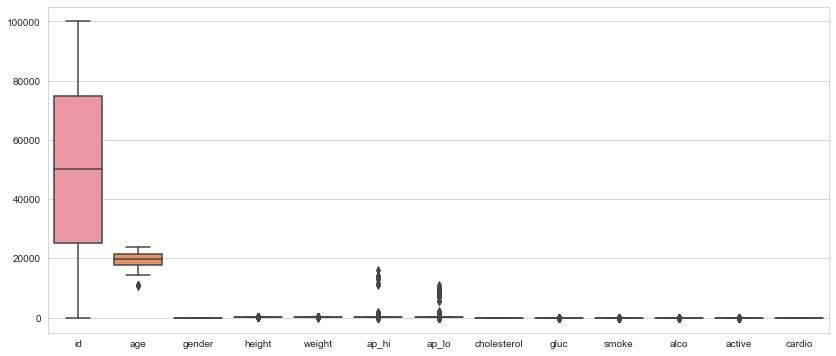

In [7]:
# Check Outlier
plt.figure(figsize=[14,6])
sns.boxplot(data=df);

In [8]:
df.shape

(70000, 13)

#### Cleaning Dataset:

In [9]:
#Identifying missing values and duplicates first.
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [10]:
duplicates = len(df) - len(df.drop(['id'],axis=1).drop_duplicates())
df.drop(['id'],axis=1,inplace=True)
df.drop_duplicates(inplace=True)
print(f'{duplicates} duplicate records dropped.')

24 duplicate records dropped.


In [11]:
df.shape

(69976, 12)

In [12]:
# Convert type of age from days to years
df["age"] = round((df["age"] / 365),2)

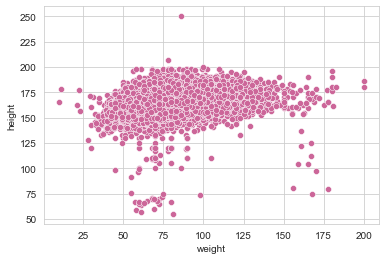

In [13]:
sns.scatterplot(df['weight'],df['height'],color="#cc6699");
# We will remove all records which seems like a bit abnormal from our analysis.

In [14]:
# 1. Weight < 35 kg
filt1 = df['weight']<35
df.drop(index=list(df[filt1].index),inplace=True)

# 2. Weight > 200 kg
filt2 = df['weight']>200
df.drop(index=list(df[filt2].index),inplace=True)

# 3. Height < 135 cm
filt3 = df['height']<135
df.drop(index=list(df[filt3].index),inplace=True)

# 4. Height > 190 cm
filt4 = df['height']>190
df.drop(index=list(df[filt4].index),inplace=True)


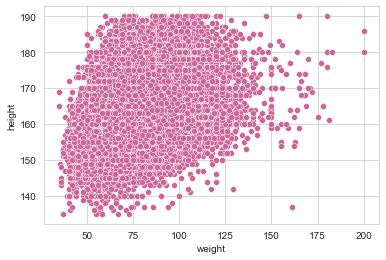

In [15]:
sns.scatterplot(df['weight'],df['height'], color="#cc6699")
plt.show()

In [16]:
df.shape

(69778, 12)

In [17]:
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.00,-0.02,-0.09,0.06,0.02,0.02,0.15,0.10,-0.05,-0.03,-0.01,0.24
gender,-0.02,1.00,0.52,0.16,0.01,0.02,-0.04,-0.02,0.34,0.17,0.01,0.01
height,-0.09,0.52,1.00,0.31,0.01,0.01,-0.06,-0.02,0.20,0.10,-0.01,-0.01
weight,0.06,0.16,0.31,1.00,0.03,0.04,0.14,0.11,0.07,0.07,-0.02,0.18
ap_hi,0.02,0.01,0.01,0.03,1.00,0.02,0.02,0.01,-0.00,0.00,-0.00,0.05
ap_lo,0.02,0.02,0.01,0.04,0.02,1.00,0.02,0.01,0.01,0.01,0.00,0.07
cholesterol,0.15,-0.04,-0.06,0.14,0.02,0.02,1.00,0.45,0.01,0.04,0.01,0.22
gluc,0.10,-0.02,-0.02,0.11,0.01,0.01,0.45,1.00,-0.00,0.01,-0.01,0.09
smoke,-0.05,0.34,0.20,0.07,-0.00,0.01,0.01,-0.00,1.00,0.34,0.03,-0.02
alco,-0.03,0.17,0.10,0.07,0.00,0.01,0.04,0.01,0.34,1.00,0.03,-0.01


In [18]:
# this method is for clean the outliers by set them to min and max ranges of specific column on the data frame.
def clean_outliers(df, target_column):
    column = df[target_column].copy()
    
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    
    min_range = Q1 - 1.5 * IQR
    max_range = Q3 + 1.5 * IQR
    
    min_outliers_mask = column < min_range
    max_outliers_mask = column > max_range
    
    column[min_outliers_mask] = min_range
    column[max_outliers_mask] = max_range
    
    return column

In [19]:
df["ap_hi"] = clean_outliers(df, 'ap_hi')

In [20]:
df["ap_lo"] = clean_outliers(df, 'ap_lo')

In [21]:
#we remove unreasonable values (diastolic higher than systolic, numbers out of measurement range)
df=df.query('90 < ap_hi < 170 & 65 < ap_lo < 105 & ap_hi> ap_lo')

#### Feature engineering

In [22]:
#We create a feature BMI using the height and weight of a person and see it's impact on target variable
df['BMI'] = df['weight']/((df['height']/100)**2)

In [23]:
# We create Pulse Pressure  featureis another indicator of heart health
df['pressure'] = abs (df['ap_hi'] - df['ap_lo'])

In [24]:
df=df.drop(['height','weight','ap_hi','ap_lo'],axis=1)

In [25]:
df.head(1)

,age,gender,cholesterol,gluc,smoke,alco,active,cardio,BMI,pressure
0,50.39,2,1,1,0,0,1,0,21.97,30


In [26]:
df.shape

(63515, 10)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63515 entries, 0 to 69999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          63515 non-null  float64
 1   gender       63515 non-null  int64  
 2   cholesterol  63515 non-null  int64  
 3   gluc         63515 non-null  int64  
 4   smoke        63515 non-null  int64  
 5   alco         63515 non-null  int64  
 6   active       63515 non-null  int64  
 7   cardio       63515 non-null  int64  
 8   BMI          63515 non-null  float64
 9   pressure     63515 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 5.3 MB


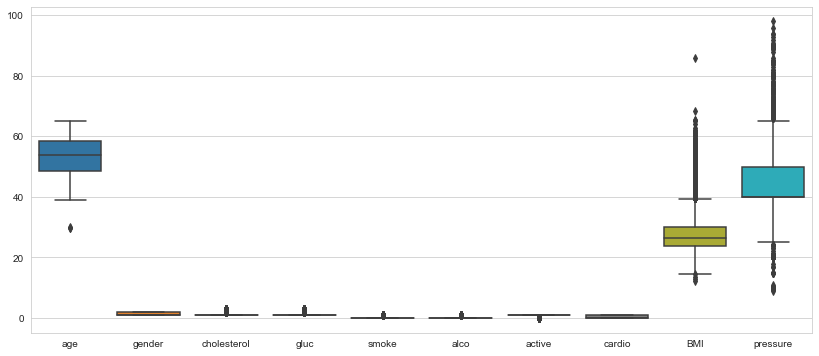

In [28]:
# Check Outlier
plt.figure(figsize=[14,6])
sns.boxplot(data=df);

<AxesSubplot:>

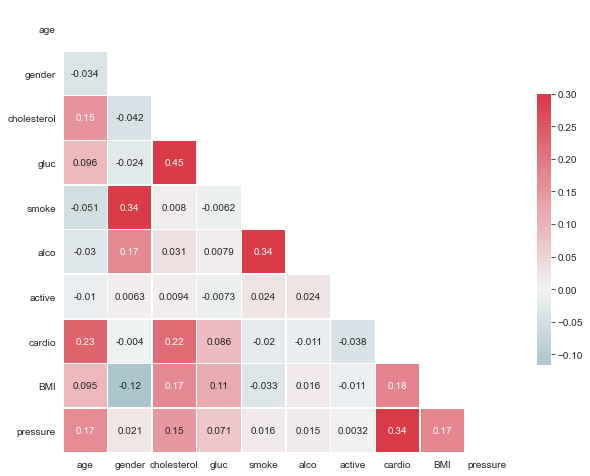

In [29]:
correl = df.corr()
cmap = sb.diverging_palette(220, 10, as_cmap = True)

mask = np.zeros_like(correl, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (10, 10))

sb.heatmap(correl, mask = mask, cmap = cmap, vmax = 0.3, center = 0,annot = True, square = True, linewidths = 0.5, cbar_kws = {"shrink": .5})

#### Exploratory data analysis-EDA

In [30]:
q= df.groupby(['gender'])[['cardio']].sum()
q

,cardio
gender,
1,20490
2,11029


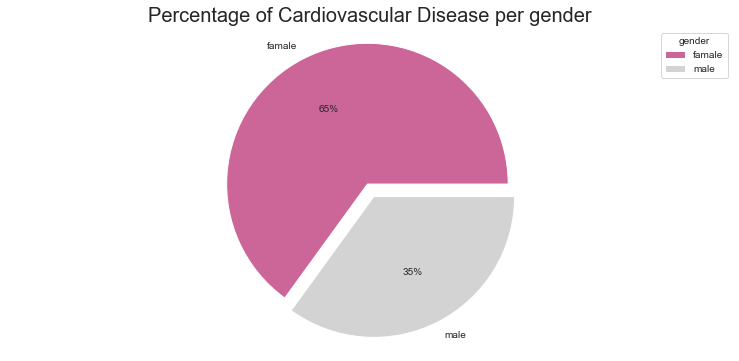

In [31]:
plt.figure(figsize=[13,6]);
plt.pie(q.cardio ,labels=['famale','male'] , colors = ['#cc6699','#D3D3D3'], explode = (0,0.1), autopct='%1.0f%%');
plt.axis('equal');
plt.legend(title = "gender");
plt.title('Percentage of Cardiovascular Disease per gender',size=20);

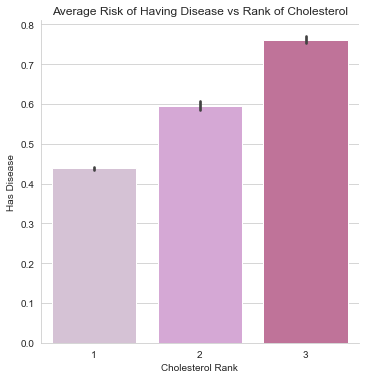

In [32]:
## There appears to be a correlation between higher cholesterol levels and cardiovascular disease
# chloesterol levels: 1 = normal, 2 = above normal, 3 = well above normal
pal = ['#D8BFD8','#DDA0DD','#cc6699']
sns.catplot(x='cholesterol', y='cardio', data=df, kind= 'bar', palette= pal)
plt.title('Average Risk of Having Disease vs Rank of Cholesterol')
plt.xlabel('Cholesterol Rank')
plt.ylabel('Has Disease');

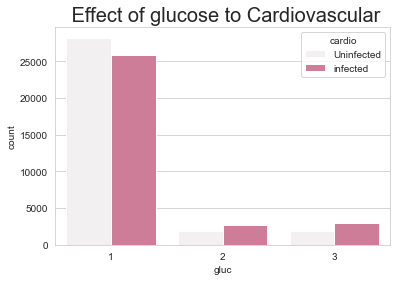

In [33]:
# There appears to be another correlation between higher glucose levels and cardiovascular disease
# glucose levels: 1 = normal, 2 = above normal, 3 = well above normal
sns.countplot(x='gluc', hue='cardio', data=df,color="#DB7093")
plt.legend(title= 'cardio',labels =['Uninfected', 'infected'])
plt.title(' Effect of glucose to Cardiovascular', size=20);
#plt_dictionary_3={1:'normal',2:'above normal',3:'well above normal'}
#df.gluc=df.gluc.map(plt_dictionary_3)

In [34]:
df.loc[(df['age'] < 40), 'age_range'] = 30
df.loc[(df['age'] >= 40) & (df['age'] < 50), 'age_range'] = 40
df.loc[(df['age'] >= 50) & (df['age'] < 60), 'age_range'] = 50
df.loc[(df['age'] >= 60) & (df['age'] < 70), 'age_range'] = 60

In [35]:
df.age_range.value_counts(normalize= True)

50.00   0.51
40.00   0.28
60.00   0.19
30.00   0.02
Name: age_range, dtype: float64

Text(0, 0.5, 'Patients')

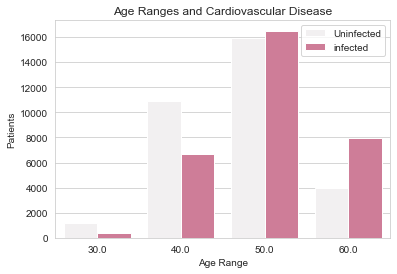

In [36]:
sns.countplot(x= 'age_range', hue= 'cardio', data= df,color="#DB7093")
plt.title('Age Ranges and Cardiovascular Disease')
plt.xlabel('Age Range')
plt.legend( ['Uninfected', 'infected'])
plt.ylabel('Patients')

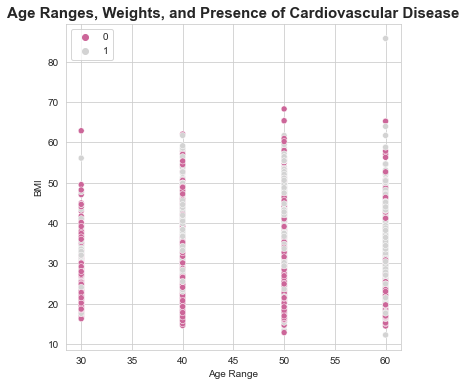

In [37]:
# 18-24.9 = perfect
# 25-29.9 = Overweight
#30 < =  obesity
plt.figure(figsize= (6,6))
pal = ['#cc6699','#D3D3D3']

sns.scatterplot(x= 'age_range', y= 'BMI', hue= 'cardio', data= df, palette= pal)
plt.title('Age Ranges, Weights, and Presence of Cardiovascular Disease', 
          fontweight= 'bold', fontsize= 15)
plt.xlabel('Age Range')
plt.ylabel('BMI')
plt.legend();

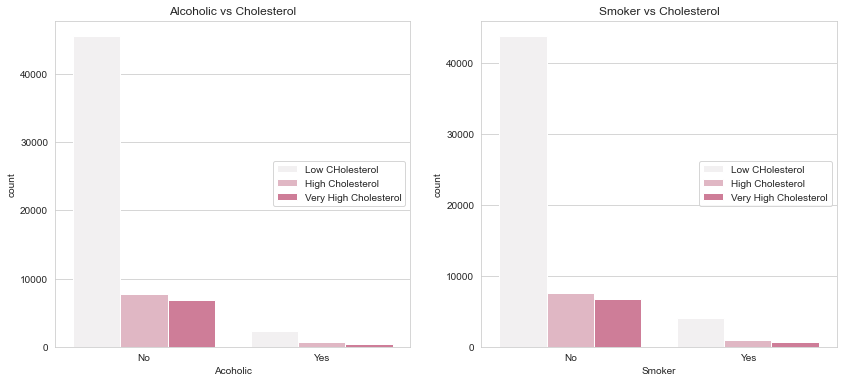

In [38]:
fig, ax =plt.subplots(1,2,figsize=(14,6))
sns.countplot(x=df["alco"],hue=df["cholesterol"],ax=ax[0], color="#DB7093")
sns.countplot(x=df["smoke"],hue=df["cholesterol"],ax=ax[1], color="#DB7093")
ax[0].set_title("Alcoholic vs Cholesterol")
ax[1].set_title("Smoker vs Cholesterol")
ax[0].set_xlabel("Acoholic")
ax[1].set_xlabel("Smoker")
ax[0].set_xticklabels(["No","Yes"])
ax[1].set_xticklabels(["No","Yes"])
ax[0].legend(["Low CHolesterol","High Cholesterol","Very High Cholesterol"],loc="center right")
ax[1].legend(["Low CHolesterol","High Cholesterol","Very High Cholesterol"],loc="center right")
fig.show()

# Machine Learning Models


------------

#### Split Data To (input-output):

In [39]:
df['cholesterol'] = df['cholesterol'].astype('category')
df['gluc'] = df['gluc'].astype('category')

In [40]:
df = pd.get_dummies(df, prefix=['cholesterol', 'gluc'], drop_first=True)

In [41]:
y = df['cardio']
X = df.drop('cardio', axis= 1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

In [43]:
y_test.shape

(15879,)

In [44]:
scaler = StandardScaler()

In [45]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
classifiers = {
    'Logistic Regression' : LogisticRegression(), 
    'Random Forest' : RandomForestClassifier(), 
    'Support Vector Machine' : SVC(), 
    'K-Nearest Neighbors' : KNeighborsClassifier(), 
    'Decision Tree' : DecisionTreeClassifier(), 
    'XGBoost' : XGBClassifier()
}

In [47]:
results = pd.DataFrame(columns= ['presision', 'recall', 'F1_score', 
                                'False_Negative', 'True_Positive'])
for key, value in classifiers.items():
    #fit models
    value.fit(X_train, y_train)
    train_pred = value.predict(X_train)
    y_pred = value.predict(X_test)

    pre_sc = precision_score(y_test, y_pred)
    rec_sc = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)
    FN = cm[1][0]
    TP = cm[1][1]

    results.loc[key] = [round(pre_sc, 2), round(rec_sc, 2), 
                        round(f1, 2), round(FN, 0), round(TP, 0)]

[18:59:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [48]:
results.sort_values(by= ['presision', 'False_Negative'], ascending= False)

,presision,recall,F1_score,False_Negative,True_Positive
Logistic Regression,0.71,0.63,0.67,2935.00,4899.00
XGBoost,0.71,0.67,0.69,2613.00,5221.00
Support Vector Machine,0.70,0.68,0.69,2523.00,5311.00
K-Nearest Neighbors,0.65,0.65,0.65,2753.00,5081.00
Random Forest,0.65,0.65,0.65,2752.00,5082.00
Decision Tree,0.60,0.61,0.60,3088.00,4746.00


In [49]:
# function to get results after each model

def get_results(model, model_name):
    train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    # get classification report
    print('{} Classification Report'.format(model_name))
    print(classification_report(y_test, y_pred))

     # get confusion matrix
    plot_confusion_matrix(model, X_test, y_test, cmap= "Blues", values_format= '.5g')
    plt.grid(False)
    plt.show()
    

    pre_sc = precision_score(y_test, y_pred)
    rec_sc = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    #get false neg and true positive
    cm = confusion_matrix(y_test, y_pred)
    FN = cm[1][0]
    TP = cm[1][1]
    
    # save measurements into results df
    results.loc[model_name] = [round(pre_sc, 2), round(rec_sc, 2), 
                               round(f1, 2), round(FN, 0), round(TP, 0)]

### XGBoost

In [50]:
# Instantiate classifier
xgb = XGBClassifier()

In [51]:
# create hyperparameter grid
param_grid_xgb = {
    'learning_rate': [0.08],
    'max_depth': [4],
    'min_child_weight': [2, 3],
    'n_estimaters' : [125, 150],
    'scale_pos_weight' : [1.5, 1.7]
}
# Instantiate Randomized Search
# n_jobs : Number of jobs to run in parallel. -1 means using all processors.
RS_xgb = RandomizedSearchCV(xgb, param_grid_xgb, n_jobs= 3, scoring= 'recall', 
                            random_state=42)

In [52]:
# fit model
RS_xgb.fit(X_train, y_train)

[18:59:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "n_estimaters" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:59:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None...
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=Non

New XGBoost Classification Report
              precision    recall  f1-score   support

           0       0.76      0.53      0.63      8045
           1       0.63      0.82      0.71      7834

    accuracy                           0.68     15879
   macro avg       0.69      0.68      0.67     15879
weighted avg       0.69      0.68      0.67     15879



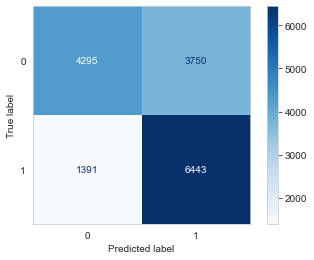

In [53]:
# see model results and add to results df
get_results(RS_xgb, 'New XGBoost')

### Random Forest

In [54]:
# Instantiate classifier
RF = RandomForestClassifier()

In [55]:
param_grid_RF = {
    'n_estimators' : [200],
    'max_depth' : [100], 
    'min_samples_split' : [5, 8], 
    'min_samples_leaf' : [3],
    'class_weight' : [{1 : 1.5}, {1 : 1.7}]
}

# Instantiate Randomized Search
RS_RF = RandomizedSearchCV(RF, param_grid_RF, n_iter= 20, scoring= 'recall', 
                           random_state= 42)

In [56]:
# fit model
RS_RF.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'class_weight': [{1: 1.5}, {1: 1.7}],
                                        'max_depth': [100],
                                        'min_samples_leaf': [3],
                                        'min_samples_split': [5, 8],
                                        'n_estimators': [200]},
                   random_state=42, scoring='recall')

In [57]:
RS_RF.best_params_

{'n_estimators': 200,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': 100,
 'class_weight': {1: 1.7}}

New Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.72      0.59      0.65      8045
           1       0.65      0.77      0.70      7834

    accuracy                           0.68     15879
   macro avg       0.69      0.68      0.68     15879
weighted avg       0.69      0.68      0.68     15879



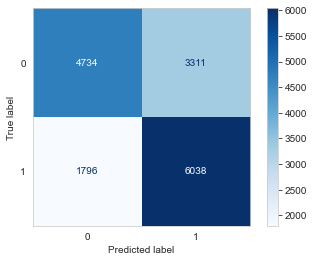

In [58]:
# see model results and add to results df
get_results(RS_RF, 'New Random Forest')

### K-Nearest Neighbor

In [59]:
# Instantiate classifier
KNN = KNeighborsClassifier()

In [60]:
# set parameter guidelines
param_grid_KNN = {
    'n_neighbors' : [23, 25, 27], 
    'weights' : ['uniform', 'distance']
}

# Instantiate Grid Search
GS_KNN = GridSearchCV(KNN, param_grid_KNN, n_jobs= 3, scoring= 'recall')

In [61]:
# fit model
GS_KNN.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=3,
             param_grid={'n_neighbors': [23, 25, 27],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [62]:
GS_KNN.best_params_

{'n_neighbors': 25, 'weights': 'uniform'}

New KNN Classification Report
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      8045
           1       0.69      0.67      0.68      7834

    accuracy                           0.69     15879
   macro avg       0.69      0.69      0.69     15879
weighted avg       0.69      0.69      0.69     15879



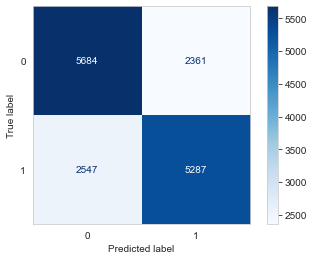

In [63]:
# see model results and add to results df
get_results(GS_KNN, 'New KNN')

### Support Vector Machines (SVM)

In [64]:
# Instantiate classifier
svc = SVC(class_weight = {1: 1.5}, random_state= 42)

In [65]:
# fit model
svc.fit(X_train, y_train)

SVC(class_weight={1: 1.5}, random_state=42)

New SVM Classification Report
              precision    recall  f1-score   support

           0       0.74      0.58      0.65      8045
           1       0.65      0.79      0.71      7834

    accuracy                           0.68     15879
   macro avg       0.69      0.68      0.68     15879
weighted avg       0.69      0.68      0.68     15879



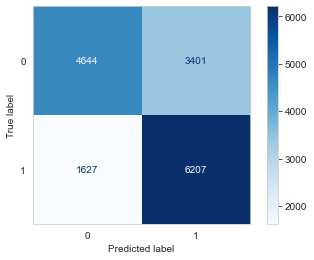

In [66]:
# see model results and add to results df
get_results(svc, 'New SVM')

### Logistic Regression

In [67]:
# Instantiate classifier
LG = LogisticRegression()

In [68]:
# set parameter criteria
param_grid_LG = {
    'penalty': ['l1', 'l2'],
    'C':[0.05, 0.1, 1], 
    'class_weight' : [None, {1 : 1.5}], 
    'random_state' : [42]
}

# Instantiate Grid Search
GS_LG = GridSearchCV(LG, param_grid_LG, scoring= 'recall')

In [69]:
# fit model
GS_LG.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.05, 0.1, 1], 'class_weight': [None, {1: 1.5}],
                         'penalty': ['l1', 'l2'], 'random_state': [42]},
             scoring='recall')

In [70]:
GS_LG.best_params_

{'C': 0.05, 'class_weight': {1: 1.5}, 'penalty': 'l2', 'random_state': 42}

In [1]:
# see model results and add to results df
get_results(GS_LG, 'New Logistic Regression')

NameError: name 'get_results' is not defined

### Decision Tree

In [72]:
# Instantiate classifier
DT = DecisionTreeClassifier()

In [73]:
# set parameter criteria
param_grid_DT = {
    'max_depth' : [3, 4, 5], 
    'min_samples_split' : [0.01, 0.05, 0.1], 
    'min_samples_leaf' : [5, 7], 
    'class_weight' : [{1 : 1.4}, {1 : 1.6}]
}

# Instantiate Randomized Search
RS_DT = RandomizedSearchCV(DT, param_grid_DT, n_jobs= 3, random_state=42)

In [74]:
# fit model
RS_DT.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_jobs=3,
                   param_distributions={'class_weight': [{1: 1.4}, {1: 1.6}],
                                        'max_depth': [3, 4, 5],
                                        'min_samples_leaf': [5, 7],
                                        'min_samples_split': [0.01, 0.05, 0.1]},
                   random_state=42)

In [75]:
RS_DT.best_params_

{'min_samples_split': 0.05,
 'min_samples_leaf': 5,
 'max_depth': 5,
 'class_weight': {1: 1.4}}

New Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      8045
           1       0.69      0.70      0.69      7834

    accuracy                           0.70     15879
   macro avg       0.70      0.70      0.70     15879
weighted avg       0.70      0.70      0.70     15879



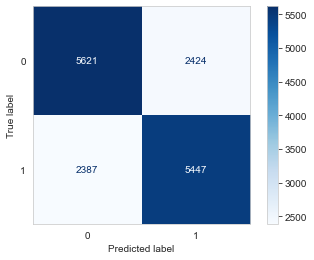

In [76]:
get_results(RS_DT, 'New Decision Tree')

### view all results

In [97]:
#view all results (models) befor and after using hyperparameter 
results = results.sort_values(by= ['recall', 'False_Negative'], 
                              ascending= False)
results

,presision,recall,F1_score,False_Negative,True_Positive
New XGBoost,0.63,0.82,0.71,1391.00,6443.00
GS Logistic Regression,0.64,0.79,0.71,1650.00,6184.00
New SVM,0.65,0.79,0.71,1627.00,6207.00
New Random Forest,0.65,0.77,0.70,1796.00,6038.00
New Decision Tree,0.69,0.70,0.69,2387.00,5447.00
Support Vector Machine,0.70,0.68,0.69,2523.00,5311.00
XGBoost,0.71,0.67,0.69,2613.00,5221.00
New KNN,0.69,0.67,0.68,2547.00,5287.00
K-Nearest Neighbors,0.65,0.65,0.65,2753.00,5081.00
Random Forest,0.65,0.65,0.65,2752.00,5082.00


### Staking

In [ ]:
scv=StackingCVClassifier(classifiers=[RS_xgb,svc,GS_LG],meta_classifier= RS_RF,random_state=42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
rec_score = recall_score(y_test, y_pred)
print("confussion matrix")
print(scv_conf_matrix)
print(classification_report(y_test,scv_predicted))
print("\n")
print('Recall of StackingCVClassifier:',metrics.recall_score(y_test,scv_predicted)*100,'%')
print('precision of StackingCVClassifier:',metrics.precision_score(y_test,scv_predicted)*100,'%')

__________

### This Work Done By:

- ELHAM ALZAHRANI
- NOUF ALKHALDI
- ABDULRAHIM ALSHEHRI